In [29]:
!pip install optuna

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

In [31]:
data=pd.read_excel(r'regression_avito_deals.xlsx')

In [6]:
data_sample = data.sample(frac=0.1, random_state=0)

In [8]:
data_sample

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
156453,a3879e8f5a2a,18a380d74b7a,Татарстан,Казань,Недвижимость,Квартиры,Продам,1,Вторичка,"1-к квартира, 34 м², 4/5 эт.","Квартира 33,5 кв.м. с новым ремонтом (делали 6...",2250000.0,2,2017-03-27,Private,0.46445
642845,e237f6802266,76e504f48dd3,Самарская область,Самара,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,SSX (PS3),Мы на АНТОШКЕ (ул.Антонова-Овсеенко 7Б)!!!/\n ...,590.0,747,2017-03-27,Shop,0.00000
640815,852f33347a37,70b4bb718d96,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,34,Сапожки на девочку. Размер 34-35,Новые. Внутри утепленные. Подойдут на худеньку...,500.0,26,2017-03-19,Company,0.00000
515907,296b5704bc7e,349d71669e6f,Новосибирская область,Новосибирск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,38,"Ботинки ""Marko Tozzi""","Натуральная кожа,ортопедический каблук.Размер ...",500.0,4,2017-03-22,Private,0.00000
128138,c48e8c8c25a4,4e0b217b70b4,Красноярский край,Норильск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,46–48 (L),Слингокуртка,"Весна- осень, слингокуртка для беременных и но...",3000.0,4,2017-03-20,Private,0.14983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257892,1606568e122d,c580d1acc86d,Красноярский край,Красноярск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,42–44 (S),Платье,NaN,1000.0,41,2017-03-20,Private,0.00000
29260,f8a1d4c7e088,f833b34a4629,Воронежская область,Россошь,Бытовая электроника,Аудио и видео,"Музыкальные центры, магнитолы",NaN,NaN,Магниторадиола Романтика-М,В рабочем состоянии,5000.0,1,2017-03-19,Private,0.08769
35742,66cfc1e0d543,033b16bf5df3,Иркутская область,Братск,Для дома и дачи,Мебель и интерьер,"Кровати, диваны и кресла",NaN,NaN,Мебель,Продам мебель дёшево!,NaN,1,2017-03-17,Private,0.86521
130812,7926e9408062,0aad4fbaf8cb,Краснодарский край,Сочи,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 41 м², 2/4 эт.",Квартира угловая. 5 витражных окон и 2 балкона...,3500000.0,2250,2017-03-17,Shop,0.02289


In [10]:
data_sample.describe(include = 'all')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
count,75171,75171,75171,75171,75171,75171,72101,42430,31927,75171,69244,7.087200e+04,75171.000000,75171,75171,75171.000000
unique,75171,66728,28,1144,9,47,329,228,564,53723,67524,NaN,NaN,15,3,NaN
top,a3879e8f5a2a,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,NaN,NaN,2017-03-27,Private,NaN
freq,1,57,7001,3163,34680,14110,11321,7425,2499,801,122,NaN,NaN,5812,54064,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383031e+06,736.540807,NaN,NaN,0.140289
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.986578e+08,5612.939964,NaN,NaN,0.261262
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,9.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+03,29.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+03,87.000000,NaN,NaN,0.153400


In [12]:
data_sample['activation_date'] = pd.to_datetime(data_sample['activation_date'], errors='coerce')

In [14]:
data_sample['activation_year'] = data_sample['activation_date'].dt.year
data_sample['activation_month'] = data_sample['activation_date'].dt.month
data_sample['activation_day'] = data_sample['activation_date'].dt.day
data_sample['activation_weekday'] = data_sample['activation_date'].dt.dayofweek

In [19]:
data_sample.drop(['item_id','user_id','category_name','param_1','param_2','param_3', 'region', 'city',
             'description', 'title', 'item_seq_number', 'activation_date', 'activation_month', 'activation_year'], axis = 1, inplace=True)

In [21]:
data_sample.isnull().sum()

parent_category_name       0
price                   4299
user_type                  0
deal_probability           0
activation_day             0
activation_weekday         0
dtype: int64

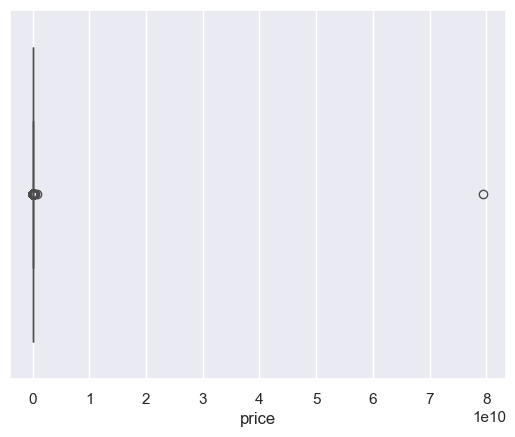

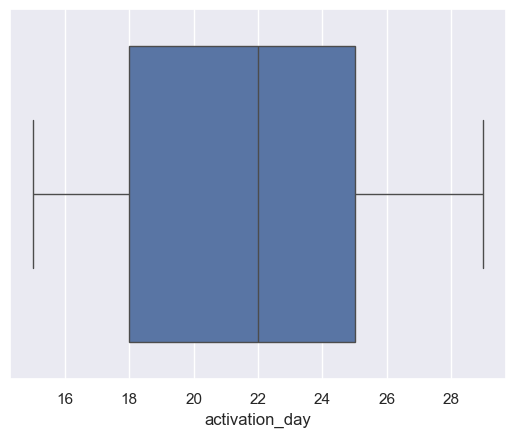

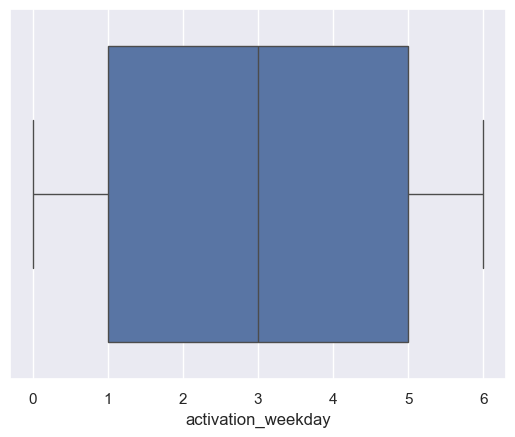

In [32]:
sns.set()

for i in data_sample.columns:
    if data_sample[i].dtypes!=object and i!='deal_probability':
        sns.boxplot(data=data_sample,x=data_sample[i])
        plt.show()

In [37]:
q1=data_sample.quantile(0.25, numeric_only=True)
q3=data_sample.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

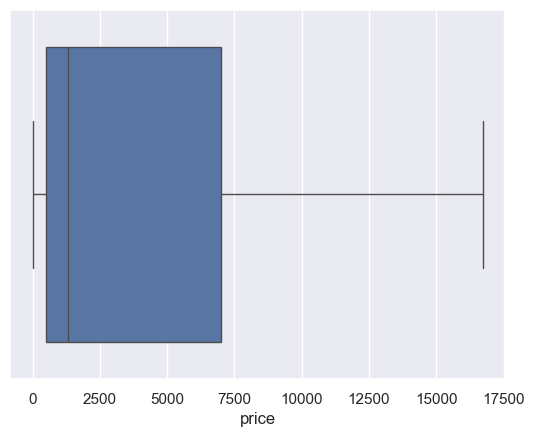

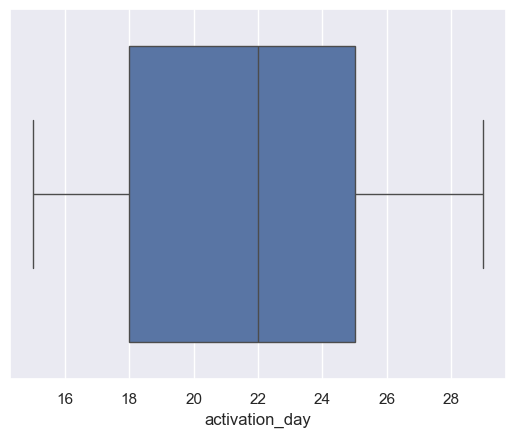

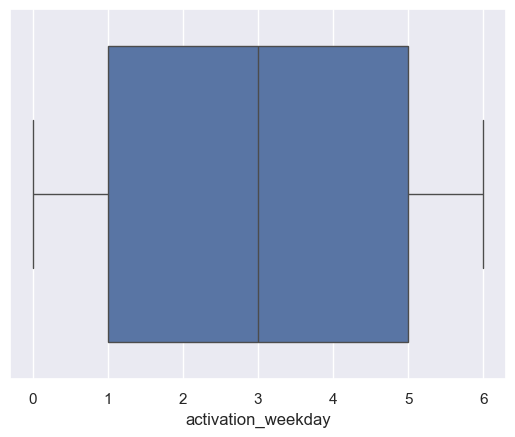

In [39]:
for i in data_sample.columns:
    if data_sample[i].dtypes!=object and i!='deal_probability':
        data_sample[i] = np.where(data_sample[i] > Upper[i],Upper[i],data_sample[i])
        data_sample[i] = np.where(data_sample[i] < Lower[i],Lower[i],data_sample[i])
        sns.boxplot(data=data_sample,x=data_sample[i])
        plt.show()

In [41]:
data_sample = pd.get_dummies(data_sample, drop_first=True, dtype=int)
data_sample

,price,deal_probability,activation_day,activation_weekday,parent_category_name_Для бизнеса,parent_category_name_Для дома и дачи,parent_category_name_Животные,parent_category_name_Личные вещи,parent_category_name_Недвижимость,parent_category_name_Транспорт,parent_category_name_Услуги,parent_category_name_Хобби и отдых,user_type_Private,user_type_Shop
156453,16750.0,0.46445,27.0,0.0,0,0,0,0,1,0,0,0,1,0
642845,590.0,0.00000,27.0,0.0,0,0,0,0,0,0,0,0,0,1
640815,500.0,0.00000,19.0,6.0,0,0,0,1,0,0,0,0,0,0
515907,500.0,0.00000,22.0,2.0,0,0,0,1,0,0,0,0,1,0
128138,3000.0,0.14983,20.0,0.0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257892,1000.0,0.00000,20.0,0.0,0,0,0,1,0,0,0,0,1,0
29260,5000.0,0.08769,19.0,6.0,0,0,0,0,0,0,0,0,1,0
35742,NaN,0.86521,17.0,4.0,0,1,0,0,0,0,0,0,1,0
130812,16750.0,0.02289,17.0,4.0,0,0,0,0,1,0,0,0,0,1


In [43]:
targets = data_sample['deal_probability']

inputs = data_sample.drop(['deal_probability'],axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

scaled = scaler.transform(inputs)

inputs_scaled = pd.DataFrame(scaled, columns=inputs.columns)

inputs_scaled

,price,activation_day,activation_weekday,parent_category_name_Для бизнеса,parent_category_name_Для дома и дачи,parent_category_name_Животные,parent_category_name_Личные вещи,parent_category_name_Недвижимость,parent_category_name_Транспорт,parent_category_name_Услуги,parent_category_name_Хобби и отдых,user_type_Private,user_type_Shop
0,1.924618,1.336800,-1.450628,-0.113135,-0.367865,-0.193204,-0.925466,2.980456,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
1,-0.670462,1.336800,-1.450628,-0.113135,-0.367865,-0.193204,-0.925466,-0.335519,-0.237977,-0.212439,-0.246533,-1.600445,4.262791
2,-0.684915,-0.639348,1.498997,-0.113135,-0.367865,-0.193204,1.080537,-0.335519,-0.237977,-0.212439,-0.246533,-1.600445,-0.234588
3,-0.684915,0.101708,-0.467420,-0.113135,-0.367865,-0.193204,1.080537,-0.335519,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
4,-0.283449,-0.392329,-1.450628,-0.113135,-0.367865,-0.193204,1.080537,-0.335519,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75166,-0.604622,-0.392329,-1.450628,-0.113135,-0.367865,-0.193204,1.080537,-0.335519,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
75167,0.037725,-0.639348,1.498997,-0.113135,-0.367865,-0.193204,-0.925466,-0.335519,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
75168,NaN,-1.133385,0.515788,-0.113135,2.718386,-0.193204,-0.925466,-0.335519,-0.237977,-0.212439,-0.246533,0.624826,-0.234588
75169,1.924618,-1.133385,0.515788,-0.113135,-0.367865,-0.193204,-0.925466,2.980456,-0.237977,-0.212439,-0.246533,-1.600445,4.262791


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.3, random_state=42)

In [49]:
def create_model(trial):
    # Building artificial neural network
    model = Sequential()

     # we add 2 hidden layers and 1 output layer
    model.add(Dense(units=trial.suggest_int('units_layer1', 6, 32), activation='relu'))
    model.add(Dense(units=trial.suggest_int('units_layer2', 6, 32), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid')) 

    # Suggest hyperparameters for the optimizer
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  
    
    return model

In [51]:
from sklearn.metrics import mean_squared_error

def optimal(trial):
    epochs = trial.suggest_int('epochs', 10, 100)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    
    model = create_model(trial)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse  

study = optuna.create_study(direction='minimize')  
study.optimize(optimal, n_trials=30)

print(f"Best trial MSE: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")


[I 2025-11-20 13:32:31,596] A new study created in memory with name: no-name-0d12dc96-0df4-4ae0-8708-423bf3f300e6
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:34:20,549] Trial 0 finished with value: 0.07479964975129401 and parameters: {'epochs': 45, 'batch_size': 47, 'units_layer1': 18, 'units_layer2': 19, 'optimizer': 'sgd', 'learning_rate': 0.00016619324217982735}. Best is trial 0 with value: 0.07479964975129401.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:36:10,851] Trial 1 finished with value: 0.1348556698133743 and parameters: {'epochs': 46, 'batch_size': 41, 'units_layer1': 13, 'units_layer2': 23, 'optimizer': 'sgd', 'learning_rate': 2.5726684658799755e-05}. Best is trial 0 with value: 0.07479964975129401.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


[I 2025-11-20 13:38:11,488] Trial 2 finished with value: 0.06900991480231955 and parameters: {'epochs': 27, 'batch_size': 20, 'units_layer1': 25, 'units_layer2': 17, 'optimizer': 'rmsprop', 'learning_rate': 0.00016641515789837422}. Best is trial 2 with value: 0.06900991480231955.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step


[I 2025-11-20 13:40:26,069] Trial 3 finished with value: 0.16895626312770162 and parameters: {'epochs': 42, 'batch_size': 29, 'units_layer1': 26, 'units_layer2': 13, 'optimizer': 'sgd', 'learning_rate': 1.1026287247012569e-05}. Best is trial 2 with value: 0.06900991480231955.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 13:44:32,978] Trial 4 finished with value: 0.0690067713010608 and parameters: {'epochs': 68, 'batch_size': 25, 'units_layer1': 19, 'units_layer2': 18, 'optimizer': 'adam', 'learning_rate': 3.4368004371405866e-05}. Best is trial 4 with value: 0.0690067713010608.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:45:04,098] Trial 5 finished with value: 0.16569593456519305 and parameters: {'epochs': 16, 'batch_size': 53, 'units_layer1': 21, 'units_layer2': 27, 'optimizer': 'sgd', 'learning_rate': 4.561358160143118e-05}. Best is trial 4 with value: 0.0690067713010608.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:46:00,607] Trial 6 finished with value: 0.19265303181634214 and parameters: {'epochs': 32, 'batch_size': 56, 'units_layer1': 12, 'units_layer2': 15, 'optimizer': 'adagrad', 'learning_rate': 2.8644809263840946e-05}. Best is trial 4 with value: 0.0690067713010608.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


[I 2025-11-20 13:46:54,558] Trial 7 finished with value: 0.06900760280850589 and parameters: {'epochs': 32, 'batch_size': 57, 'units_layer1': 9, 'units_layer2': 31, 'optimizer': 'adam', 'learning_rate': 0.00014640581149821179}. Best is trial 4 with value: 0.0690067713010608.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:49:15,745] Trial 8 finished with value: 0.06900593185452854 and parameters: {'epochs': 67, 'batch_size': 42, 'units_layer1': 24, 'units_layer2': 31, 'optimizer': 'adagrad', 'learning_rate': 0.0021934451531677615}. Best is trial 8 with value: 0.06900593185452854.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:54:19,652] Trial 9 finished with value: 0.1231697763984983 and parameters: {'epochs': 95, 'batch_size': 29, 'units_layer1': 7, 'units_layer2': 27, 'optimizer': 'adagrad', 'learning_rate': 0.00015199734837727184}. Best is trial 8 with value: 0.06900593185452854.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 13:57:25,725] Trial 10 finished with value: 0.06900607606065373 and parameters: {'epochs': 72, 'batch_size': 38, 'units_layer1': 32, 'units_layer2': 6, 'optimizer': 'adagrad', 'learning_rate': 0.004807353713030617}. Best is trial 8 with value: 0.06900593185452854.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:00:28,733] Trial 11 finished with value: 0.06900620620784695 and parameters: {'epochs': 73, 'batch_size': 38, 'units_layer1': 29, 'units_layer2': 6, 'optimizer': 'adagrad', 'learning_rate': 0.005837527895191207}. Best is trial 8 with value: 0.06900593185452854.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:03:24,414] Trial 12 finished with value: 0.06900594620590157 and parameters: {'epochs': 74, 'batch_size': 38, 'units_layer1': 32, 'units_layer2': 7, 'optimizer': 'adagrad', 'learning_rate': 0.004633760530218397}. Best is trial 8 with value: 0.06900593185452854.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:06:25,089] Trial 13 finished with value: 0.06900514470141177 and parameters: {'epochs': 94, 'batch_size': 46, 'units_layer1': 32, 'units_layer2': 11, 'optimizer': 'adagrad', 'learning_rate': 0.0013236249607736603}. Best is trial 13 with value: 0.06900514470141177.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:09:31,003] Trial 14 finished with value: 0.06901175168470935 and parameters: {'epochs': 100, 'batch_size': 47, 'units_layer1': 25, 'units_layer2': 10, 'optimizer': 'rmsprop', 'learning_rate': 0.001389085777718073}. Best is trial 13 with value: 0.06900514470141177.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:11:54,071] Trial 15 finished with value: 0.0690007870912017 and parameters: {'epochs': 89, 'batch_size': 62, 'units_layer1': 22, 'units_layer2': 23, 'optimizer': 'adagrad', 'learning_rate': 0.0010322317512211803}. Best is trial 15 with value: 0.0690007870912017.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:14:01,360] Trial 16 finished with value: 0.07203972731434688 and parameters: {'epochs': 87, 'batch_size': 63, 'units_layer1': 16, 'units_layer2': 23, 'optimizer': 'adagrad', 'learning_rate': 0.0006413475590496704}. Best is trial 15 with value: 0.0690007870912017.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step


[I 2025-11-20 14:16:05,160] Trial 17 finished with value: 0.07040635635439586 and parameters: {'epochs': 86, 'batch_size': 64, 'units_layer1': 29, 'units_layer2': 22, 'optimizer': 'adagrad', 'learning_rate': 0.0005236768693416393}. Best is trial 15 with value: 0.0690007870912017.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step


[I 2025-11-20 14:18:38,116] Trial 18 finished with value: 0.06900078329213669 and parameters: {'epochs': 86, 'batch_size': 50, 'units_layer1': 22, 'units_layer2': 12, 'optimizer': 'adam', 'learning_rate': 0.0015815502597438416}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 14:20:07,111] Trial 19 finished with value: 0.06905673692016155 and parameters: {'epochs': 60, 'batch_size': 59, 'units_layer1': 22, 'units_layer2': 15, 'optimizer': 'adam', 'learning_rate': 0.002281902775714995}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step


[I 2025-11-20 14:22:34,256] Trial 20 finished with value: 0.06900297774017614 and parameters: {'epochs': 83, 'batch_size': 51, 'units_layer1': 15, 'units_layer2': 26, 'optimizer': 'adam', 'learning_rate': 0.00046947612593070475}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:25:00,856] Trial 21 finished with value: 0.06900633835625161 and parameters: {'epochs': 83, 'batch_size': 51, 'units_layer1': 16, 'units_layer2': 26, 'optimizer': 'adam', 'learning_rate': 0.0004575905785955933}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 14:27:15,878] Trial 22 finished with value: 0.06904292476805139 and parameters: {'epochs': 81, 'batch_size': 52, 'units_layer1': 21, 'units_layer2': 21, 'optimizer': 'adam', 'learning_rate': 0.0010204458899124708}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 14:28:50,495] Trial 23 finished with value: 0.0690060486608932 and parameters: {'epochs': 60, 'batch_size': 60, 'units_layer1': 13, 'units_layer2': 25, 'optimizer': 'adam', 'learning_rate': 0.00025773375965393254}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:31:14,050] Trial 24 finished with value: 0.0690814426812523 and parameters: {'epochs': 91, 'batch_size': 55, 'units_layer1': 18, 'units_layer2': 20, 'optimizer': 'adam', 'learning_rate': 0.0028353573096132527}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:33:36,173] Trial 25 finished with value: 0.06901210112224897 and parameters: {'epochs': 79, 'batch_size': 49, 'units_layer1': 15, 'units_layer2': 28, 'optimizer': 'adam', 'learning_rate': 0.0094463646786448}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:37:01,052] Trial 26 finished with value: 0.06901261728992679 and parameters: {'epochs': 100, 'batch_size': 44, 'units_layer1': 19, 'units_layer2': 24, 'optimizer': 'rmsprop', 'learning_rate': 0.0009377137787431898}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 14:39:15,148] Trial 27 finished with value: 0.06900188164726447 and parameters: {'epochs': 90, 'batch_size': 61, 'units_layer1': 23, 'units_layer2': 29, 'optimizer': 'adam', 'learning_rate': 0.0003164078689077903}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-11-20 14:41:40,618] Trial 28 finished with value: 0.06900910617946003 and parameters: {'epochs': 92, 'batch_size': 60, 'units_layer1': 23, 'units_layer2': 29, 'optimizer': 'adam', 'learning_rate': 9.069307810322019e-05}. Best is trial 18 with value: 0.06900078329213669.
C:\Users\admin\AppData\Local\Temp\ipykernel_13860\2415221461.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


[I 2025-11-20 14:43:00,355] Trial 29 finished with value: 0.06900804604402683 and parameters: {'epochs': 49, 'batch_size': 64, 'units_layer1': 27, 'units_layer2': 32, 'optimizer': 'rmsprop', 'learning_rate': 0.00027444450390089057}. Best is trial 18 with value: 0.06900078329213669.


Best trial MSE: 0.06900078329213669
Best hyperparameters: {'epochs': 86, 'batch_size': 50, 'units_layer1': 22, 'units_layer2': 12, 'optimizer': 'adam', 'learning_rate': 0.0015815502597438416}


In [53]:
best_params = study.best_trial.params

best_params

{'epochs': 86,
 'batch_size': 50,
 'units_layer1': 22,
 'units_layer2': 12,
 'optimizer': 'adam',
 'learning_rate': 0.0015815502597438416}

In [55]:
best_model = Sequential()
best_model.add(Dense(units=best_params['units_layer1'], activation='relu'))
best_model.add(Dense(units=best_params['units_layer2'], activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))

In [57]:
if best_params['optimizer'] == 'adam':
    best_optimizer = Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'sgd':
    best_optimizer = SGD(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    best_optimizer = RMSprop(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'adagrad':
    best_optimizer = Adagrad(learning_rate=best_params['learning_rate'])

In [59]:
best_model.compile(optimizer=best_optimizer, loss='mean_squared_error', metrics=['mae'])

In [61]:
from sklearn import metrics

def evaluate(model,X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train, epochs=41, batch_size=52)
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    return results_df

In [63]:
evaluate(best_model, X_train, y_train, X_test, y_test)

Epoch 1/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0839 - mae: 0.2344
Epoch 2/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0679 - mae: 0.1910
Epoch 3/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1909
Epoch 4/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1910
Epoch 5/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0680 - mae: 0.1909
Epoch 6/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0679 - mae: 0.1909
Epoch 7/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0679 - mae: 0.1909
Epoch 8/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0680 - mae: 0.1908
Epoch 9/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1909
Epoch 10/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1911
Epoch 11/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1907
Epoch 12/41
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - mae: 0.1910
E

,Metric,Train,Test
0,MAE,0.193201,0.194370
1,MSE,0.067959,0.069007
2,RMSE,0.260689,0.262691
3,R2,-0.032382,-0.008322
